In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from neural_network import *
from keras.callbacks import ModelCheckpoint

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
if len(physical_devices)>0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

#### Loading data

In [3]:
def get_data(dataframe): #-> Tuple[tf.data.Dataset, tf.data.Dataset]:
  training_data, testing_data = train_test_split(dataframe, test_size=0.2, random_state=25)
  training_data = training_data.to_numpy()
  testing_data = testing_data.to_numpy()
  return (training_data, testing_data)

In [4]:
data_directory = './data'
training_ds_prep_file_name = 'training_ds_prepared.csv'
training_ds_prep_df = pd.read_csv(f'{data_directory}/{training_ds_prep_file_name}')

In [5]:
x = training_ds_prep_df.iloc[:,:29]
y = training_ds_prep_df.iloc[:,29:]

x_training, x_test = get_data(x)
y_training, y_test = get_data(y)

## Testing different models

First we define utility functions to train the model and plot the history

In [38]:
def save_history(filename, model):
    # ejemplo de filename:'history1.npy'
    np.save(filename,model.history.history)
    
def train_eval_model(trainX, trainY, testX, testY, model, epochs = 2000, batch_size = 32, model_save_file_name = None, history_save_file_name = None):
    callbacks = None
    if model_save_file_name != None:
        acc_check_point = ModelCheckpoint(model_save_file_name+'_acc', monitor='val_acc', verbose=1,save_best_only=True, mode='max')
        checkpoint = ModelCheckpoint(model_save_file_name, monitor='val_loss', verbose=1,save_best_only=True, mode='min')
        callbacks=[checkpoint,acc_check_point]
    hist = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size,  validation_data=(testX, testY),callbacks=callbacks)
    if history_save_file_name != None:
        save_history(history_save_file_name, model)
    return hist

def best_loss_epoch(history):
    epoch_count = range(1, len(history.history['loss']) + 1)
    val_loss = history.history['val_loss']
    best_val_loss = min(val_loss)
    best_val_loss_idx = val_loss.index(best_val_loss)
    best_epoch = epoch_count[best_val_loss_idx]
    best_val_loss_val_acc = history.history['val_acc'][best_val_loss_idx]
    print(f'Epoch {best_epoch} - best_val_loss:{best_val_loss}, val_acc:{best_val_loss_val_acc}')
    
    val_acc = history.history['val_acc']
    best_val_acc = max(val_acc)
    best_val_acc_idx = val_acc.index(best_val_acc)
    best_epoch_by_acc = epoch_count[best_val_acc_idx]

    print(f'Epoch {best_epoch_by_acc} - best_val_acc:{best_val_acc}')
    
    #return (best_epoch,best_val_loss,best_val_acc)    


In [7]:
models_dir = './models'
hist_dir = './hist' 

In [39]:
def plot_history(history,title,measures = ['loss','val_loss']):#, save_image_filename, title):
    epoch_count = range(1, len(history.history['loss']) + 1)

    for m in measures:
        plt.plot(history.history[m],label=f'{m}')
        
    plt.title(title)
    plt.legend(measures)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    if 'acc' in measures:
        plt.ylabel('Accuracy')
    #plt.savefig(save_image_filename)
    plt.axvline(x = epoch_count[history.history['val_loss'].index(min(history.history['val_loss']))] , color = 'c', linestyle="dotted", label = "min val_loss")
    plt.axvline(x = epoch_count[history.history['val_acc'].index(max(history.history['val_acc']))] , color = 'salmon', linestyle="dotted", label = "max val_acc")
    plt.legend()
    #plt.text(epoch_count[history.history['val_loss'].index(min(history.history['val_loss']))],1.1,'min val_loss',rotation=0)
    plt.show()

First set of experiments will vary the architecture of the NeuralNetwork, varying the number of hidden layers and the number of neurons for each layer.
Being static the rest of the hyper parameters, number of features (and of course the number of neurons in the last layer).

### Model 29F - 16 - ReLu

In [9]:
m_29f_16_relu = NeuralNetworkOneActFn(29,[16],'relu')
m_29f_16_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_16_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_relu)

Epoch 1/2000
25/25 [==============================] - 1s 11ms/step - loss: 1.4808 - acc: 0.1297 - val_loss: 1.2265 - val_acc: 0.2487
Epoch 2/2000
25/25 [==============================] - 0s 9ms/step - loss: 1.1674 - acc: 0.2815 - val_loss: 1.0824 - val_acc: 0.3886
Epoch 3/2000
25/25 [==============================] - 0s 8ms/step - loss: 1.0577 - acc: 0.4656 - val_loss: 1.0260 - val_acc: 0.5337
Epoch 4/2000
25/25 [==============================] - 0s 6ms/step - loss: 1.0046 - acc: 0.4838 - val_loss: 0.9943 - val_acc: 0.5285
Epoch 5/2000
25/25 [==============================] - 0s 7ms/step - loss: 0.9713 - acc: 0.5175 - val_loss: 0.9776 - val_acc: 0.5130
Epoch 6/2000
25/25 [==============================] - 0s 9ms/step - loss: 0.9505 - acc: 0.5253 - val_loss: 0.9666 - val_acc: 0.5130
Epoch 7/2000
25/25 [==============================] - 0s 10ms/step - loss: 0.9349 - acc: 0.5292 - val_loss: 0.9589 - val_acc: 0.5130
Epoch 8/2000
25/25 [==============================] - 0s 5ms/step - loss: 

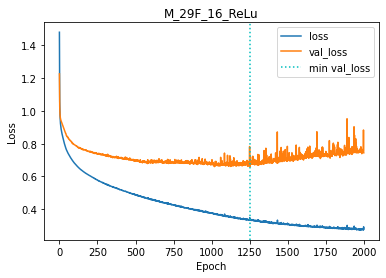

In [10]:
plot_history(hist_m_29f_16_relu,'M_29F_16_ReLu')

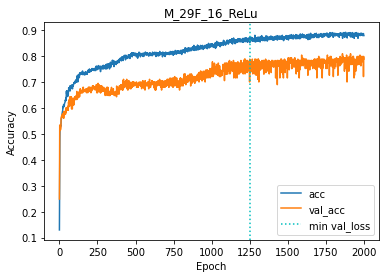

In [11]:
plot_history(hist_m_29f_16_relu,'M_29F_16_ReLu',['acc','val_acc'])

In [12]:
best_loss_epoch(hist_m_29f_16_relu)


epoch 1252: val_loss = 0.6592732667922974, val_acc = 0.772020697593689


### Model 29F - 32 - ReLu

In [13]:
model_name = 'M_29F_32_ReLu'
m_29f_32_relu = NeuralNetworkOneActFn(29,[32],'relu')
m_29f_32_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_32_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_32_relu)

Epoch 1/2000
25/25 [==============================] - 0s 8ms/step - loss: 1.0100 - acc: 0.4280 - val_loss: 0.9774 - val_acc: 0.4819
Epoch 2/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.9063 - acc: 0.5629 - val_loss: 0.9517 - val_acc: 0.5181
Epoch 3/2000
25/25 [==============================] - 0s 5ms/step - loss: 0.8699 - acc: 0.6213 - val_loss: 0.9434 - val_acc: 0.5389
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.8530 - acc: 0.6368 - val_loss: 0.9401 - val_acc: 0.5389
Epoch 5/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8417 - acc: 0.6420 - val_loss: 0.9353 - val_acc: 0.5596
Epoch 6/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.8322 - acc: 0.6498 - val_loss: 0.9318 - val_acc: 0.5544
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 0.8243 - acc: 0.6472 - val_loss: 0.9319 - val_acc: 0.5596
Epoch 8/2000
25/25 [==============================] - 0s 4ms/step - loss: 0.

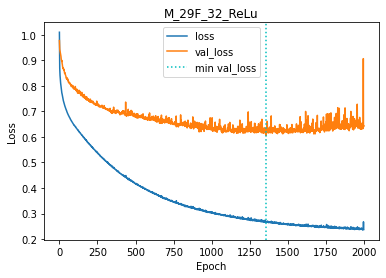

In [14]:
plot_history(hist_m_29f_32_relu,model_name)

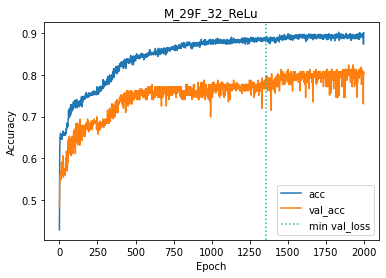

In [15]:
plot_history(hist_m_29f_32_relu,model_name,['acc','val_acc'])

In [16]:
best_loss_epoch(hist_m_29f_32_relu)

epoch 1358: val_loss = 0.6056684255599976, val_acc = 0.787564754486084


### Model 29F - 64 - ReLu

In [17]:
model_name = 'M_29F_64_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_64_relu = NeuralNetworkOneActFn(29,[64],'relu')
m_29f_64_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_64_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_64_relu,model_save_file_name=model_sf_name,history_save_file_name=hist_sf_name)

Epoch 1/2000
21/25 [========================>.....] - ETA: 0s - loss: 1.0309 - acc: 0.4003
Epoch 1: val_loss improved from inf to 0.99471, saving model to ./models\M_29F_64_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_64_ReLu\assets
25/25 [==============================] - 1s 36ms/step - loss: 1.0205 - acc: 0.3995 - val_loss: 0.9947 - val_acc: 0.4560
Epoch 2/2000
20/25 [=======================>......] - ETA: 0s - loss: 0.9327 - acc: 0.5094
Epoch 2: val_loss improved from 0.99471 to 0.96208, saving model to ./models\M_29F_64_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_64_ReLu\assets
25/25 [==============================] - 1s 51ms/step - loss: 0.9278 - acc: 0.5214 - val_loss: 0.9621 - val_acc: 0.5440
Epoch 3/2000
21/25 [========================>.....] - ETA: 0s - loss: 0.8860 - acc: 0.5923
Epoch 3: val_loss improved from 0.96208 to 0.94780, saving model to ./models\M_29F_64_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_64_ReLu\assets
25/25 [================

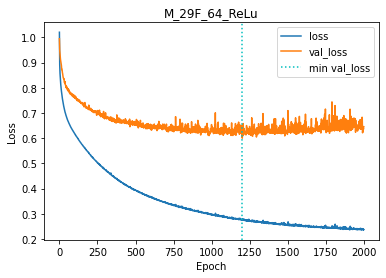

In [18]:
plot_history(hist_m_29f_64_relu,model_name)

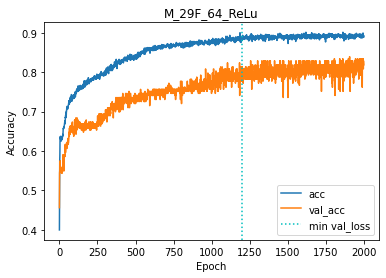

In [19]:
plot_history(hist_m_29f_64_relu,model_name,['acc','val_acc'])

In [20]:
best_loss_epoch(hist_m_29f_64_relu)

epoch 1202: val_loss = 0.6002564430236816, val_acc = 0.8134714961051941


### Model 29F - 128 - ReLu

In [21]:
model_name = 'M_29F_128_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_128_relu = NeuralNetworkOneActFn(29,[128],'relu')
m_29f_128_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_128_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_128_relu,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/2000
18/25 [====================>.........] - ETA: 0s - loss: 1.0259 - acc: 0.5069
Epoch 1: val_loss improved from inf to 1.01475, saving model to ./models\M_29F_128_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_128_ReLu\assets
25/25 [==============================] - 2s 53ms/step - loss: 1.0024 - acc: 0.5227 - val_loss: 1.0147 - val_acc: 0.4767
Epoch 2/2000
24/25 [===========================>..] - ETA: 0s - loss: 0.9335 - acc: 0.5443
Epoch 2: val_loss improved from 1.01475 to 0.97501, saving model to ./models\M_29F_128_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_128_ReLu\assets
25/25 [==============================] - 1s 35ms/step - loss: 0.9348 - acc: 0.5422 - val_loss: 0.9750 - val_acc: 0.5078
Epoch 3/2000
14/25 [===============>..............] - ETA: 0s - loss: 0.9176 - acc: 0.5558
Epoch 3: val_loss improved from 0.97501 to 0.95798, saving model to ./models\M_29F_128_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_128_ReLu\assets
25/25 [==========

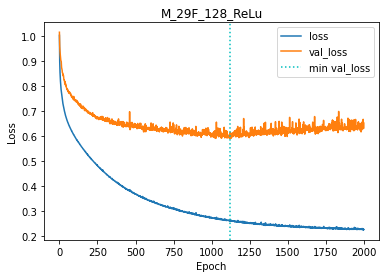

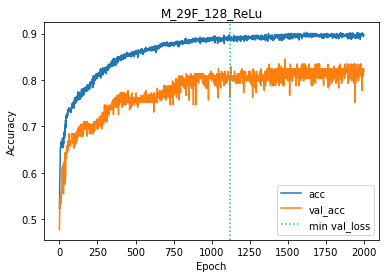

epoch 1118: val_loss = 0.5910007953643799, val_acc = 0.8082901835441589


In [22]:
plot_history(hist_m_29f_128_relu,model_name)
plot_history(hist_m_29f_128_relu,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_128_relu)

### Model 29F - 16 - 16 - ReLu

In [23]:
model_name = 'M_29F_16_16_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_16_16_relu = NeuralNetworkOneActFn(29,[16,16],'relu')
m_29f_16_16_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_16_16_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_16_relu,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/2000
17/25 [===================>..........] - ETA: 0s - loss: 1.0213 - acc: 0.4357
Epoch 1: val_loss improved from inf to 1.00440, saving model to ./models\M_29F_16_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_16_ReLu\assets
25/25 [==============================] - 2s 57ms/step - loss: 1.0116 - acc: 0.4306 - val_loss: 1.0044 - val_acc: 0.4197
Epoch 2/2000
23/25 [==========================>...] - ETA: 0s - loss: 0.9578 - acc: 0.4674
Epoch 2: val_loss improved from 1.00440 to 0.97075, saving model to ./models\M_29F_16_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_16_ReLu\assets
25/25 [==============================] - 4s 175ms/step - loss: 0.9550 - acc: 0.4682 - val_loss: 0.9708 - val_acc: 0.4922
Epoch 3/2000
20/25 [=======================>......] - ETA: 0s - loss: 0.9228 - acc: 0.5188
Epoch 3: val_loss improved from 0.97075 to 0.95549, saving model to ./models\M_29F_16_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_16_ReLu\assets
25/2

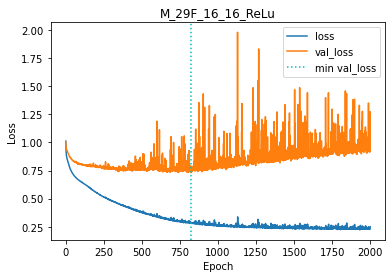

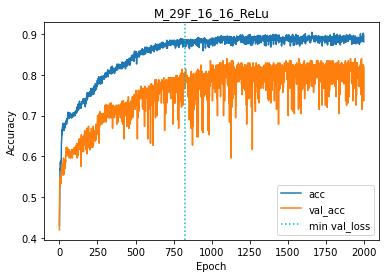

epoch 824: val_loss = 0.7312963604927063, val_acc = 0.7979274392127991


In [24]:
plot_history(hist_m_29f_16_16_relu,model_name)
plot_history(hist_m_29f_16_16_relu,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_16_16_relu)

### Model 29F - 32 - 16 - ReLu

In [25]:
model_name = 'M_29F_32_16_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_32_16_relu = NeuralNetworkOneActFn(29,[32,16],'relu')
m_29f_32_16_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_32_16_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_32_16_relu,epochs= 1000 ,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
19/25 [=====================>........] - ETA: 0s - loss: 1.0947 - acc: 0.3306
Epoch 1: val_loss improved from inf to 1.02097, saving model to ./models\M_29F_32_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_32_16_ReLu\assets
25/25 [==============================] - 1s 33ms/step - loss: 1.0726 - acc: 0.3268 - val_loss: 1.0210 - val_acc: 0.3575
Epoch 2/1000
13/25 [==============>...............] - ETA: 0s - loss: 0.9580 - acc: 0.3870
Epoch 2: val_loss improved from 1.02097 to 1.00025, saving model to ./models\M_29F_32_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_32_16_ReLu\assets
25/25 [==============================] - 1s 38ms/step - loss: 0.9493 - acc: 0.4150 - val_loss: 1.0002 - val_acc: 0.4922
Epoch 3/1000
24/25 [===========================>..] - ETA: 0s - loss: 0.9242 - acc: 0.4870
Epoch 3: val_loss improved from 1.00025 to 0.99575, saving model to ./models\M_29F_32_16_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_32_16_ReLu\assets
25/25

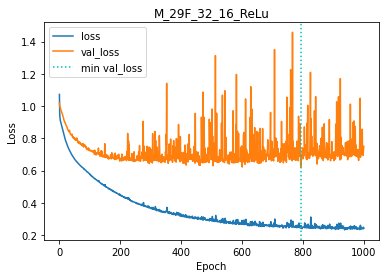

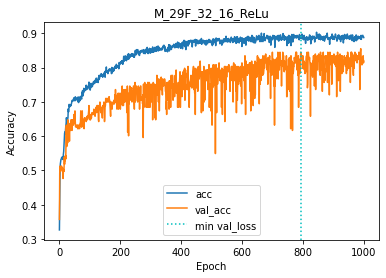

epoch 793: val_loss = 0.6208819150924683, val_acc = 0.8445596098899841


In [26]:
plot_history(hist_m_29f_32_16_relu,model_name)
plot_history(hist_m_29f_32_16_relu,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_32_16_relu)

### Model 29F - 16 - 32 - ReLu

In [27]:
model_name = 'M_29F_16_32_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_16_32_relu = NeuralNetworkOneActFn(29,[16,32],'relu')
m_29f_16_32_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_16_32_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_32_relu,epochs= 1000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
18/25 [====================>.........] - ETA: 0s - loss: 1.0792 - acc: 0.3958
Epoch 1: val_loss improved from inf to 1.03295, saving model to ./models\M_29F_16_32_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_ReLu\assets
25/25 [==============================] - 1s 39ms/step - loss: 1.0671 - acc: 0.4112 - val_loss: 1.0329 - val_acc: 0.4715
Epoch 2/1000
16/25 [==================>...........] - ETA: 0s - loss: 1.0009 - acc: 0.4688
Epoch 2: val_loss improved from 1.03295 to 0.99628, saving model to ./models\M_29F_16_32_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_ReLu\assets
25/25 [==============================] - 1s 35ms/step - loss: 0.9919 - acc: 0.4760 - val_loss: 0.9963 - val_acc: 0.4922
Epoch 3/1000
21/25 [========================>.....] - ETA: 0s - loss: 0.9487 - acc: 0.5074
Epoch 3: val_loss improved from 0.99628 to 0.97749, saving model to ./models\M_29F_16_32_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_ReLu\assets
25/25

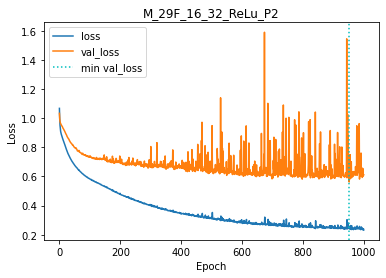

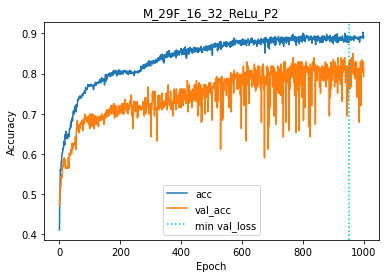

Epoch 952 - best_val_loss:0.5623214244842529, val_acc:0.8290155529975891 | best_val_acc:0.8497409224510193


In [31]:
plot_history(hist_m_29f_16_32_relu,model_name)
plot_history(hist_m_29f_16_32_relu,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_16_32_relu)

Continue the training of the model

In [40]:
model_name = 'M_29F_16_32_ReLu_P2'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

hist_m_29f_16_32_relu_p2 =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_32_relu,epochs= 1000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
23/25 [==========================>...] - ETA: 0s - loss: 0.2431 - acc: 0.8736
Epoch 1: val_loss improved from inf to 0.60602, saving model to ./models\M_29F_16_32_ReLu_P2
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_ReLu_P2\assets

Epoch 1: val_acc improved from -inf to 0.81865, saving model to ./models\M_29F_16_32_ReLu_P2_acc
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_ReLu_P2_acc\assets
25/25 [==============================] - 2s 90ms/step - loss: 0.2400 - acc: 0.8755 - val_loss: 0.6060 - val_acc: 0.8187
Epoch 2/1000
21/25 [========================>.....] - ETA: 0s - loss: 0.2268 - acc: 0.8914
Epoch 2: val_loss did not improve from 0.60602

Epoch 2: val_acc did not improve from 0.81865
25/25 [==============================] - 0s 19ms/step - loss: 0.2263 - acc: 0.8949 - val_loss: 0.6470 - val_acc: 0.8187
Epoch 3/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.2373 - acc: 0.8878
Epoch 3: val_loss improved from 0.60602 to 0.58587, savi

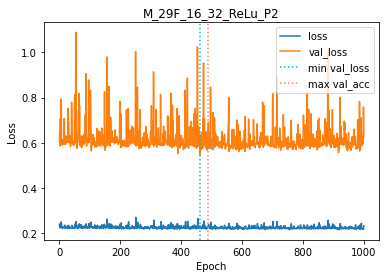

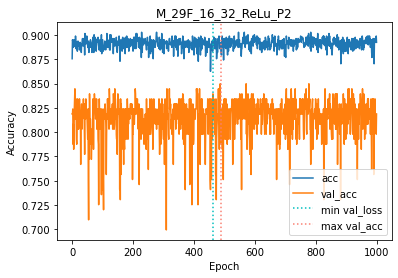

Epoch 463 - best_val_loss:0.5472958087921143, val_acc:0.8393782377243042
Epoch 487 - best_val_acc:0.8497409224510193


In [41]:
plot_history(hist_m_29f_16_32_relu_p2,model_name)
plot_history(hist_m_29f_16_32_relu_p2,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_16_32_relu_p2)

### Model 29F - 32 - 32 - ReLu

In [42]:
model_name = 'M_29F_32_32_ReLu'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_32_32_relu = NeuralNetworkOneActFn(29,[32,32],'relu')
m_29f_32_32_relu.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_32_32_relu =train_eval_model(x_training,y_training,x_test,y_test,m_29f_32_32_relu,epochs=1000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
17/25 [===================>..........] - ETA: 0s - loss: 1.0121 - acc: 0.5239
Epoch 1: val_loss improved from inf to 0.97161, saving model to ./models\M_29F_32_32_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu\assets

Epoch 1: val_acc improved from -inf to 0.54922, saving model to ./models\M_29F_32_32_ReLu_acc
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_acc\assets
25/25 [==============================] - 3s 94ms/step - loss: 0.9890 - acc: 0.5603 - val_loss: 0.9716 - val_acc: 0.5492
Epoch 2/1000
22/25 [=========================>....] - ETA: 0s - loss: 0.9106 - acc: 0.5966
Epoch 2: val_loss improved from 0.97161 to 0.94481, saving model to ./models\M_29F_32_32_ReLu
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu\assets

Epoch 2: val_acc did not improve from 0.54922
25/25 [==============================] - 3s 115ms/step - loss: 0.9013 - acc: 0.6070 - val_loss: 0.9448 - val_acc: 0.5078
Epoch 3/1000
21/25 [=======================

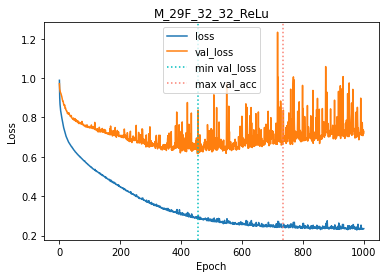

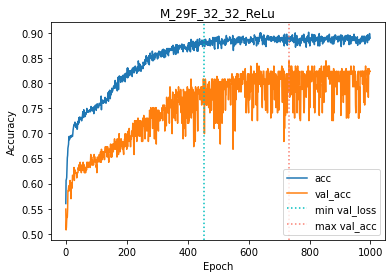

Epoch 454 - best_val_loss:0.6163464784622192, val_acc:0.7979274392127991
Epoch 734 - best_val_acc:0.8445596098899841


In [43]:
plot_history(hist_m_29f_32_32_relu,model_name)
plot_history(hist_m_29f_32_32_relu,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_32_32_relu)

Sigmoid as activation function

In [48]:
model_name = 'M_29F_16_32_Sig'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_16_32_sigmoid = NeuralNetworkOneActFn(29,[16,32],'sigmoid')
m_29f_16_32_sigmoid.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_16_32_sigmoid =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_32_sigmoid,epochs= 2000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/2000
23/25 [==========================>...] - ETA: 0s - loss: 1.0030 - acc: 0.5272
Epoch 1: val_loss improved from inf to 0.99108, saving model to ./models\M_29F_16_32_Sig
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig\assets

Epoch 1: val_acc improved from -inf to 0.47668, saving model to ./models\M_29F_16_32_Sig_acc
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig_acc\assets
25/25 [==============================] - 3s 126ms/step - loss: 1.0017 - acc: 0.5253 - val_loss: 0.9911 - val_acc: 0.4767
Epoch 2/2000
25/25 [==============================] - ETA: 0s - loss: 0.9360 - acc: 0.5253
Epoch 2: val_loss improved from 0.99108 to 0.97864, saving model to ./models\M_29F_16_32_Sig
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig\assets

Epoch 2: val_acc did not improve from 0.47668
25/25 [==============================] - 2s 91ms/step - loss: 0.9360 - acc: 0.5253 - val_loss: 0.9786 - val_acc: 0.4767
Epoch 3/2000
25/25 [=============================

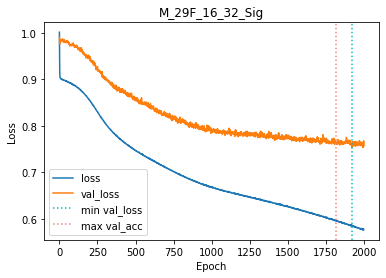

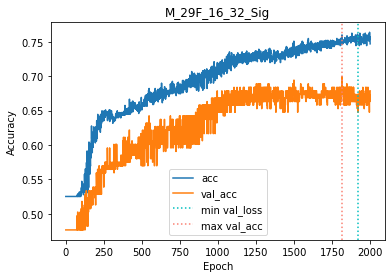

Epoch 1921 - best_val_loss:0.7533333897590637, val_acc:0.6735751032829285
Epoch 1815 - best_val_acc:0.6994818449020386


In [49]:
plot_history(hist_m_29f_16_32_sigmoid,model_name)
plot_history(hist_m_29f_16_32_sigmoid,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_16_32_sigmoid)

In [50]:
model_name = 'M_29F_16_32_Sig_P2'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

hist_m_29f_16_32_sig_p2 =train_eval_model(x_training,y_training,x_test,y_test,m_29f_16_32_sigmoid,epochs= 4000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/4000
19/25 [=====================>........] - ETA: 0s - loss: 0.5702 - acc: 0.7615
Epoch 1: val_loss improved from inf to 0.75593, saving model to ./models\M_29F_16_32_Sig_P2
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig_P2\assets

Epoch 1: val_acc improved from -inf to 0.67358, saving model to ./models\M_29F_16_32_Sig_P2_acc
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig_P2_acc\assets
25/25 [==============================] - 2s 98ms/step - loss: 0.5759 - acc: 0.7575 - val_loss: 0.7559 - val_acc: 0.6736
Epoch 2/4000
24/25 [===========================>..] - ETA: 0s - loss: 0.5755 - acc: 0.7565
Epoch 2: val_loss did not improve from 0.75593

Epoch 2: val_acc improved from 0.67358 to 0.67876, saving model to ./models\M_29F_16_32_Sig_P2_acc
INFO:tensorflow:Assets written to: ./models\M_29F_16_32_Sig_P2_acc\assets
25/25 [==============================] - 3s 135ms/step - loss: 0.5762 - acc: 0.7549 - val_loss: 0.7570 - val_acc: 0.6788
Epoch 3/4000
22/25 [===

## Add a Sigmoid activation layer after ReLu

In [44]:
model_name = 'M_29F_32_32_ReLu_Sig'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

m_29f_32_32_relu_sig = NeuralNetworkTwoActFn(29,[32],'relu','sigmoid')
m_29f_32_32_relu_sig.compile(loss="categorical_crossentropy", optimizer="sgd",metrics=['acc'])
hist_m_29f_32_32_relu_sig =train_eval_model(x_training,y_training,x_test,y_test,m_29f_32_32_relu_sig,epochs=1000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
22/25 [=========================>....] - ETA: 0s - loss: 1.1482 - acc: 0.4077
Epoch 1: val_loss improved from inf to 1.04532, saving model to ./models\M_29F_32_32_ReLu_Sig
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_Sig\assets

Epoch 1: val_acc improved from -inf to 0.47668, saving model to ./models\M_29F_32_32_ReLu_Sig_acc
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_Sig_acc\assets
25/25 [==============================] - 4s 132ms/step - loss: 1.1413 - acc: 0.4163 - val_loss: 1.0453 - val_acc: 0.4767
Epoch 2/1000
23/25 [==========================>...] - ETA: 0s - loss: 0.9819 - acc: 0.5231
Epoch 2: val_loss improved from 1.04532 to 0.99025, saving model to ./models\M_29F_32_32_ReLu_Sig
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_Sig\assets

Epoch 2: val_acc did not improve from 0.47668
25/25 [==============================] - 3s 118ms/step - loss: 0.9800 - acc: 0.5253 - val_loss: 0.9902 - val_acc: 0.4767
Epoch 3/1000
25/25

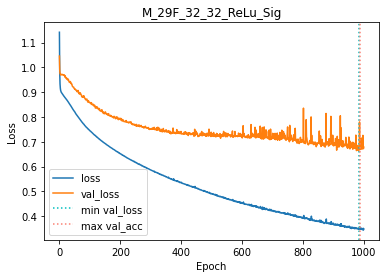

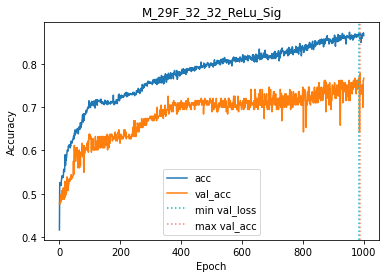

Epoch 983 - best_val_loss:0.6637819409370422, val_acc:0.7668393850326538
Epoch 988 - best_val_acc:0.7772020697593689


In [45]:
plot_history(hist_m_29f_32_32_relu_sig,model_name)
plot_history(hist_m_29f_32_32_relu_sig,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_32_32_relu_sig)

In [46]:
model_name = 'M_29F_32_32_ReLu_Sig_P2'
model_sf_name = f'{models_dir}/{model_name}'
hist_sf_name = f'{hist_dir}/{model_name}'

hist_m_29f_32_32_relu_sig_p2 =train_eval_model(x_training,y_training,x_test,y_test,m_29f_32_32_relu_sig,epochs= 1000,model_save_file_name=model_sf_name, history_save_file_name=hist_sf_name)

Epoch 1/1000
25/25 [==============================] - ETA: 0s - loss: 0.3446 - acc: 0.8612
Epoch 1: val_loss improved from inf to 0.68296, saving model to ./models\M_29F_32_32_ReLu_Sig_P2
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_Sig_P2\assets

Epoch 1: val_acc improved from -inf to 0.77202, saving model to ./models\M_29F_32_32_ReLu_Sig_P2_acc
INFO:tensorflow:Assets written to: ./models\M_29F_32_32_ReLu_Sig_P2_acc\assets
25/25 [==============================] - 3s 142ms/step - loss: 0.3446 - acc: 0.8612 - val_loss: 0.6830 - val_acc: 0.7720
Epoch 2/1000
24/25 [===========================>..] - ETA: 0s - loss: 0.3479 - acc: 0.8750
Epoch 2: val_loss did not improve from 0.68296

Epoch 2: val_acc did not improve from 0.77202
25/25 [==============================] - 1s 24ms/step - loss: 0.3472 - acc: 0.8755 - val_loss: 0.6842 - val_acc: 0.7513
Epoch 3/1000
24/25 [===========================>..] - ETA: 0s - loss: 0.3451 - acc: 0.8685
Epoch 3: val_loss improved from 0.68296

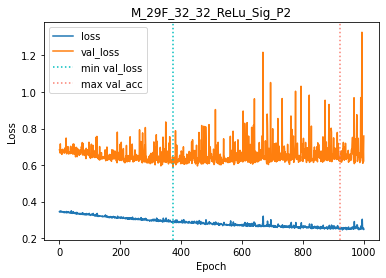

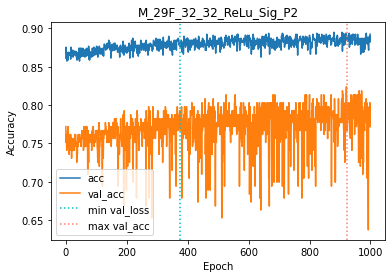

Epoch 374 - best_val_loss:0.5895892381668091, val_acc:0.787564754486084
Epoch 922 - best_val_acc:0.8238341808319092


In [47]:
plot_history(hist_m_29f_32_32_relu_sig_p2,model_name)
plot_history(hist_m_29f_32_32_relu_sig_p2,model_name,['acc','val_acc'])
best_loss_epoch(hist_m_29f_32_32_relu_sig_p2)